In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt



In [2]:
# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Normalize pixel values to range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 100)
y_test = tf.keras.utils.to_categorical(y_test, 100)



169001437/169001437 [==============================] - 3s 0us/step


In [3]:
# Define the ANN model
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(512, activation='relu'),
    BatchNormalization(),  # Batch normalization layer
    Dropout(0.2),          # Dropout layer to prevent overfitting
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(100, activation='softmax')
])



In [4]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [5]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [6]:
# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
313/313 [==============================] - 20s 59ms/step - loss: 4.1619 - accuracy: 0.0794 - val_loss: 3.8566 - val_accuracy: 0.1138
Epoch 2/50
313/313 [==============================] - 15s 47ms/step - loss: 3.7457 - accuracy: 0.1277 - val_loss: 3.6406 - val_accuracy: 0.1509
Epoch 3/50
313/313 [==============================] - 14s 45ms/step - loss: 3.5949 - accuracy: 0.1519 - val_loss: 3.6846 - val_accuracy: 0.1378
Epoch 4/50
313/313 [==============================] - 14s 46ms/step - loss: 3.5112 - accuracy: 0.1652 - val_loss: 3.5482 - val_accuracy: 0.1618
Epoch 5/50
313/313 [==============================] - 14s 46ms/step - loss: 3.4418 - accuracy: 0.1787 - val_loss: 3.4986 - val_accuracy: 0.1671
Epoch 6/50
313/313 [==============================] - 14s 46ms/step - loss: 3.3804 - accuracy: 0.1904 - val_loss: 3.4428 - val_accuracy: 0.1791
Epoch 7/50
313/313 [==============================] - 14s 46ms/step - loss: 3.3443 - accuracy: 0.1943 - val_loss: 3.4725 - val_accuracy:

In [10]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

313/313 [==============================] - 2s 6ms/step - loss: 3.4209 - accuracy: 0.1838
Test Accuracy: 0.18379999697208405


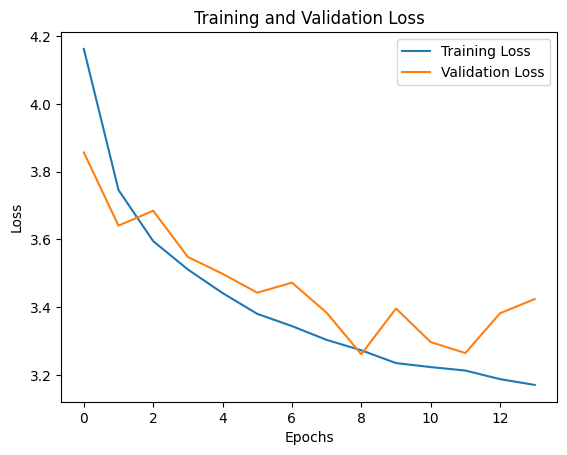

In [9]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

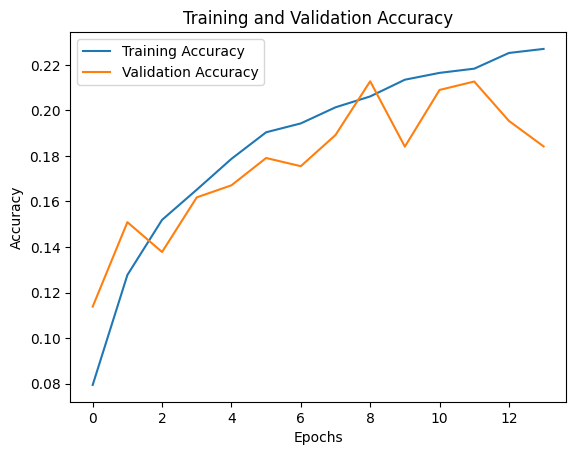

In [11]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()



313/313 [==============================] - 2s 6ms/step


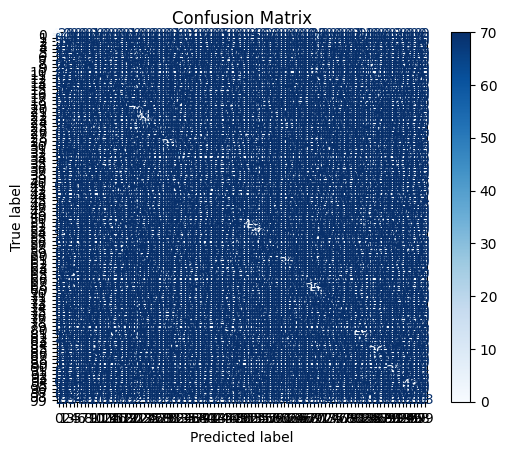

In [12]:
# Confusion matrix
y_pred = np.argmax(model.predict(x_test), axis=-1)
cm = confusion_matrix(np.argmax(y_test, axis=-1), y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(100))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()